# What sells a car?

I am an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. I need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import datetime as dt
import warnings

warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


### Load data

In [2]:
# Load the data file into a DataFrame
df = pd.read_csv('vehicles_us.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [138]:
# print the general/summary information about the DataFrame
df.describe(include='all')


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [139]:
# print a sample of data
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


1) We have missing values in [model_year], [cylinders], [odometer], [paint_color], [is_4wd].

2) We have min price 1 (impossible)

3) [model_year] and [date_posted] are object type, not time.

### Conclusions and further steps

1) We can't fix missing values in [model_year], [cylinders], [odometer], [paint_color] because this is individual parameters. Maybe there are some depends with other columns, need check it. Missing values in [is_4wd] we can fill with 0. However, need to remember, that if this parameter is important for our analysis - need to ask managers is "NaN"=not 4wd or not.

2) Need to decide what price is outliers

3) We can change the data type of the columns

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Missing values in [is_4wd] we can fill with 0 - right decision
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~We can't fix missing values in [model_year], [cylinders], [odometer], [paint_color]  - we can fill in missing values for those columns~~ 

~~paint_color - simply 'unknown'~~
    
~~For other columns, please consider what other features they might be associated with.~~
    
~~Exp model_year is model specific. So we can fill in the missing values using the median of the values grouped by model. It is easy to make with transform()~~
    
~~df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))~~
    
    
~~Please fill in the gaps for the remaining columns~~

</div>

<div class="alert alert-block alert-info"> <b>Ekaterina, thank you for your review!
    "Exp model_year is model specific. So we can fill in the missing values using the median of the values grouped by model."
    Not really agree with it, because one model can produced in several years. But for practice I will do it.</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Yes, you're right, but we can't do better than this for filling in the missing values for model_year.
</div>

In [140]:
df.paint_color = df.paint_color.fillna('unknown')

In [141]:
print(df.paint_color.value_counts())
print()
print(df.paint_color.isna().sum())

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

0


In [142]:
df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))

In [143]:
df['model_year'].isna().sum()

0

In [144]:
df['cylinders'] = df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))

In [145]:
df['cylinders'].isna().sum()

0

<div class="alert alert-block alert-info"> <b>For odometer we also can fill in missing values? This is very individual parameter, and one model of car can be with significant difference from another model. For example one car was used a lot, another car stood in garage for years.</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-info"> <b>I dont change my further work with missing values in order to dont lost what were there. If you'll accept this project I will change it to clear work. (my english is not very good, but i hope you understand me)</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~Yes, we need to fill in missing values for the odometer as well And yes you're right it won't be very accurate but it's better than nothing~~
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~Unfortunately I can't accept your project until you fill in the gaps in the odometer~~
</div>

In [146]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year', 'condition'])['odometer'].transform('median'))
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,NaN,2018-12-15,18
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,unknown,NaN,2018-11-03,41
31806,1700,1996.0,ford mustang,salvage,6.0,gas,NaN,manual,convertible,white,NaN,2019-03-31,46
33257,4500,1963.0,chevrolet impala,fair,6.0,gas,NaN,automatic,sedan,unknown,NaN,2019-03-17,38
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,NaN,2018-06-24,25
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59
46911,22300,2003.0,chevrolet corvette,new,8.0,gas,NaN,manual,convertible,black,NaN,2018-11-08,23


In [147]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year', 'type'])['odometer'].transform('median'))
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,NaN,2018-12-15,18
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,unknown,NaN,2018-11-03,41
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


In [148]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year'])['odometer'].transform('median'))
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


<div class="alert alert-block alert-info"> <b>I will delete this unique model</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
    
Super
</div>

In [149]:
df.iloc[45694]

price                18000
model_year          1929.0
model           ford f-150
condition             good
cylinders              8.0
fuel                   gas
odometer               NaN
transmission        manual
type                 other
paint_color         silver
is_4wd                 NaN
date_posted     2018-11-18
days_listed             59
Name: 45694, dtype: object

In [150]:
df = df.drop(45694)
df.iloc[45694]

price                    5900
model_year             2003.0
model           toyota tacoma
condition                good
cylinders                 6.0
fuel                      gas
odometer             195000.0
transmission        automatic
type                   pickup
paint_color             white
is_4wd                    NaN
date_posted        2018-12-18
days_listed                10
Name: 45695, dtype: object

## Treat missing values (if any)

In [151]:
display(df[df['model_year'].isna()])
display(df[df['cylinders'].isna()])
display(df[df['odometer'].isna()])
display(df[df['paint_color'].isna()])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


I don't see any correlation between NaN values in one and another column. As I wrote abobe - we can't know those individual parameters, so we can't  fill missing values in columns [model_year], [cylinders], [odometer], [paint_color].

But we can fill NaN values in [is_4wd] with 0.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Correct please this part and fill in the missing values~~

</div>

<div class="alert alert-block alert-info"> <b>Did it</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Super 
</div>

In [152]:
df['is_4wd'] = df['is_4wd'].fillna(0)
display(df)
print()
print(df['is_4wd'].isna().sum())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71



0


## Fix data types

In [153]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  float64       
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  float64       
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  float64       
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.5+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
~~After filling in the missing values please change datatype for year and cylinders They must be int~~  
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Done
</div>

In [154]:
df['cylinders'] = df['cylinders'].astype('int')
df['model_year'] = df['model_year'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  int64         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  int64         
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  float64       
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 5.5+ MB


## Enrich data

In [155]:
# Add datetime values for when the ad was placed
df['weekday_posted'] = pd.to_datetime(df['date_posted']).dt.weekday
df['month_posted'] = pd.to_datetime(df['date_posted']).dt.month
df['year_posted'] = pd.to_datetime(df['date_posted']).dt.year
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51524 non-null  int64         
 1   model_year      51524 non-null  int64         
 2   model           51524 non-null  object        
 3   condition       51524 non-null  object        
 4   cylinders       51524 non-null  int64         
 5   fuel            51524 non-null  object        
 6   odometer        51524 non-null  float64       
 7   transmission    51524 non-null  object        
 8   type            51524 non-null  object        
 9   paint_color     51524 non-null  object        
 10  is_4wd          51524 non-null  float64       
 11  date_posted     51524 non-null  datetime64[ns]
 12  days_listed     51524 non-null  int64         
 13  weekday_posted  51524 non-null  int64         
 14  month_posted    51524 non-null  int64         
 15  ye

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Great
</div>

In [156]:
# Add the vehicle's age when the ad was placed
df['age_when_posted'] = (df['year_posted'] - df['model_year']).astype(int) + 1
df


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7
3,1500,2003,ford f-150,fair,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~+1 in year is very important. It help us avoid nulls.Also many car companies says: You bought yesterday, your car is not new now.~~

    
    data['age_when_posted'] = (data['year_posted'] - data['model_year']).astype(int) + 1
    
</div>

<div class="alert alert-block alert-info"> <b>Did it, thanks a lot!)</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Super
</div>

In [157]:
# Add the vehicle's average mileage per year
df['mileage_per_year'] = df['odometer'] / df['age_when_posted']
display(df)
df.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
count,51524.00000,51524.000000,51524,51524,51524.000000,51524,51524.000000,51524,51524,51524,51524.000000,51524,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,13,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2795,24773,NaN,47287,NaN,46902,12405,10029,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,12132.35104,2009.795125,NaN,NaN,6.121031,NaN,115234.815571,NaN,NaN,NaN,0.496312,NaN,39.554382,3.005376,6.628406,2018.307468,9.512344,14510.977369
std,10040.86718,6.089046,NaN,NaN,1.657452,NaN,62209.897308,NaN,NaN,NaN,0.499991,NaN,28.204413,1.997735,3.474115,0.461450,6.102743,8640.370871
min,1.00000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.00000,2007.000000,NaN,NaN,4.000000,NaN,73159.000000,NaN,NaN,NaN,0.000000,NaN,19.000000,1.000000,3.000000,2018.000000,5.000000,9800.000000


I see that there are some inf values in ['mileage_per_year']. I understand why this happened - because dividing by zero, but now I dont know how to avoid it. 

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
You are right, in pandas division by zero gives infinity When you fix age_when_posted everything will be fine
</div>

In [158]:
# It might help to replace the condition values with something that can be manipulated more easily
print(df['condition'].unique())
condition_dict={
    'new':5,
    'like new':4,
    'excellent':3,
    'good':2,
    'fair':1,
    'salvage':0
}
print(condition_dict.keys())
print(condition_dict.values())
df['condition_id']=df['condition'].apply(lambda x: condition_dict[x])
#to make column condition_id right after condition:
cols = df.columns.tolist()
cols = cols[0:4] + cols[-1:] + cols[4:-1]
df = df[cols]
df

['good' 'like new' 'fair' 'excellent' 'salvage' 'new']
dict_keys(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'])
dict_values([5, 4, 3, 2, 1, 0])


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,2,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,1,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,4,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,0,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,3,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,2,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Perfect function
</div>

<div class="alert alert-block alert-info"> <b>Yeah... but it's not mine) Thanks to Anastasia's webinar</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Who uses the function is the one who owns it)))
</div>

## Check clean data

In [159]:
# print the general/summary information about the DataFrame
display(df)
df.describe(include='all')


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,2,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,1,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,4,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,0,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,3,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,2,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
count,51524.00000,51524.000000,51524,51524,51524.000000,51524.000000,51524,51524.000000,51524,51524,51524,51524.000000,51524,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000
unique,NaN,NaN,100,6,NaN,NaN,5,NaN,3,13,13,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford f-150,excellent,NaN,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2795,24773,NaN,NaN,47287,NaN,46902,12405,10029,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,12132.35104,2009.795125,NaN,NaN,2.637548,6.121031,NaN,115234.815571,NaN,NaN,NaN,0.496312,NaN,39.554382,3.005376,6.628406,2018.307468,9.512344,14510.977369
std,10040.86718,6.089046,NaN,NaN,0.712449,1.657452,NaN,62209.897308,NaN,NaN,NaN,0.499991,NaN,28.204413,1.997735,3.474115,0.461450,6.102743,8640.370871
min,1.00000,1908.000000,NaN,NaN,0.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.00000,2007.000000,NaN,NaN,2.000000,4.000000,NaN,73159.000000,NaN,NaN,NaN,0.000000,NaN,19.000000,1.000000,3.000000,2018.000000,5.000000,9800.000000


In [160]:
# print a sample of data
df.sample(5)



,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
39777,13989,2014,jeep grand cherokee laredo,excellent,3,6,gas,119440.0,automatic,SUV,black,1.0,2018-08-11,60,5,8,2018,5,23888.000000
6409,6950,2010,toyota prius,excellent,3,4,gas,129563.0,automatic,hatchback,brown,0.0,2018-07-04,11,2,7,2018,9,14395.888889
17438,21400,2012,toyota tundra,good,2,8,gas,118162.0,automatic,truck,black,1.0,2018-09-07,63,4,9,2018,7,16880.285714
5470,6800,2004,ram 1500,good,2,8,gas,166000.0,manual,pickup,silver,1.0,2018-12-17,57,0,12,2018,15,11066.666667
10863,14995,2011,ram 1500,excellent,3,8,gas,105464.0,automatic,truck,unknown,1.0,2019-02-26,15,1,2,2019,9,11718.222222


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

<AxesSubplot:xlabel='price', ylabel='Count'>

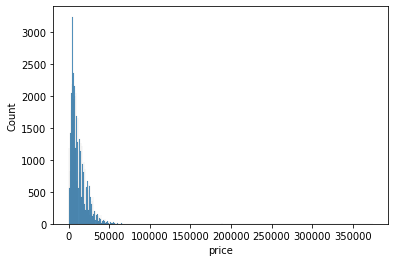

In [161]:
#
sns.histplot(data=df, x='price')

Very big tail on the right, so there are a lot of outliers on the right

<AxesSubplot:xlabel='age_when_posted', ylabel='Count'>

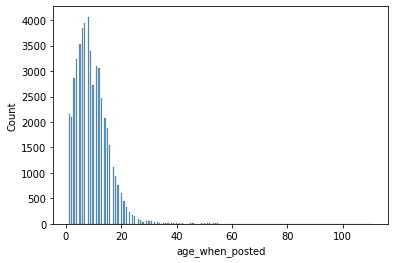

In [162]:
#
sns.histplot(data=df, x='age_when_posted')

Not so big tail on the right, but still there are a lot of outliers on the right

<AxesSubplot:xlabel='odometer', ylabel='Count'>

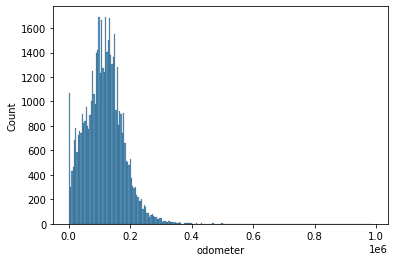

In [163]:
sns.histplot(data=df, x='odometer')

There is tail on the right too

<AxesSubplot:xlabel='cylinders', ylabel='Count'>

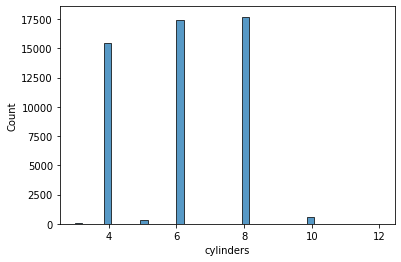

In [164]:
sns.histplot(data=df, x='cylinders')

Here we see 3 parameters with big values (4,6,8), and other we almost don't see

<AxesSubplot:xlabel='condition_id', ylabel='Count'>

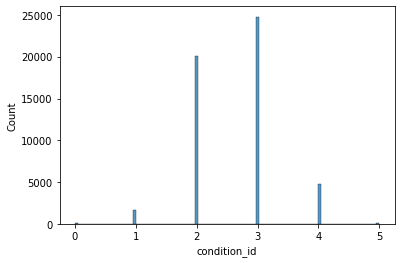

In [165]:
#
sns.histplot(data=df, x='condition_id')


Here we see very few count of values of 1 and 5

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
In order not to repeat the same code  </div>

<div class="alert alert-block alert-info"> <b>Thank you! I will remove the extra when the project is accepted, so as not to lose what was. </b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Ok
</div>

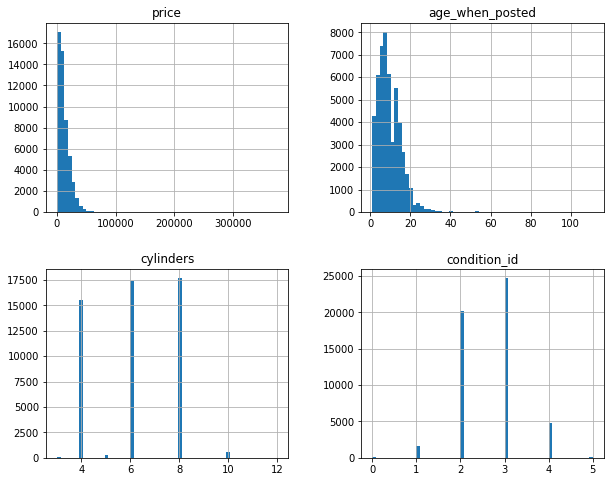

In [166]:
#REVIEWER CODE
df.hist(column=['price', 'age_when_posted', 'cylinders', 'condition_id'], figsize=(10,8),bins=60);

## Study and treat outliers


In [167]:
def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    df[parameter].hist()
    plt.show()
    if df[parameter].mean()>df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(df[parameter].describe())
    ninety_nine = np.percentile(df[parameter], 99)
    three = np.percentile(df[parameter], 3)
    print('---------------------------------------')
    print('min border:',three)
    print('max border:',ninety_nine)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_nine)
    print('We have',len(df[(df[parameter]<three)|(df[parameter]>ninety_nine)]),"values that we can consider outliers")

The histogram of: price


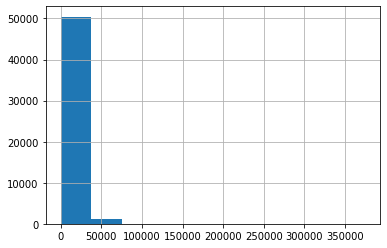

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64
---------------------------------------
min border: 1000.0
max border: 43995.0
---------------------------------------
The outliers are considered to be values below 1000.0 and above 43995.0
We have 1919 values that we can consider outliers


In [168]:
distribution_percentile('price')

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Very nice function We can also use +/-3IQR for extreme outliers and +/-1.5IQR for moderate outliers as an alternative.It is also very useful to look at boxplots
</div>

In [169]:
df_without_age_nan = df[df['age_when_posted'].notna()]
display(df_without_age_nan)
df_without_odo_nan = df[df['odometer'].notna()]
display(df_without_odo_nan)

,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,2,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,1,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,4,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,0,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,3,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,2,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,2,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,1,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,4,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,0,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,3,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,2,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


<div class="alert alert-block alert-info"> <b>Don't need this anymore, but i will delete this later. to know what was before</b> <a class="tocSkip"></a> 
</div>

In [170]:
def distribution_percentile_without_age_nan(parameter):
    print('The histogram of: {}'.format(parameter))
    df_without_age_nan[parameter].hist()
    plt.show()
    if df_without_age_nan[parameter].mean()>df_without_age_nan[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(df_without_age_nan[parameter].describe())
    ninety_nine = np.percentile(df_without_age_nan[parameter], 99)
    three = np.percentile(df_without_age_nan[parameter], 3)
    print('---------------------------------------')
    print('min border:',three)
    print('max border:',ninety_nine)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_nine)
    print('We have',len(df_without_age_nan[(df_without_age_nan[parameter]<three)|(df_without_age_nan[parameter]>ninety_nine)]),"values that we can consider outliers")

    
def distribution_percentile_without_odo_nan(parameter):
    print('The histogram of: {}'.format(parameter))
    df_without_odo_nan[parameter].hist()
    plt.show()
    if df_without_odo_nan[parameter].mean()>df_without_odo_nan[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(df_without_odo_nan[parameter].describe())
    ninety_nine = np.percentile(df_without_odo_nan[parameter], 99)
    three = np.percentile(df_without_odo_nan[parameter], 3)
    print('---------------------------------------')
    print('min border:',three)
    print('max border:',ninety_nine)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_nine)
    print('We have',len(df_without_odo_nan[(df_without_odo_nan[parameter]<three)|(df_without_odo_nan[parameter]>ninety_nine)]),"values that we can consider outliers")

The histogram of: age_when_posted


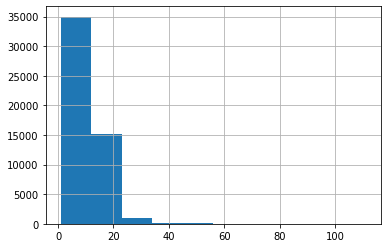

The distribution is skewed to the right
---------------------------------------
Statistics on: age_when_posted
count    51524.000000
mean         9.512344
std          6.102743
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: age_when_posted, dtype: float64
---------------------------------------
min border: 1.0
max border: 28.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 28.0
We have 511 values that we can consider outliers
The histogram of: odometer


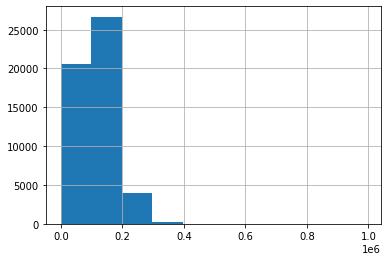

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     51524.000000
mean     115234.815571
std       62209.897308
min           0.000000
25%       73159.000000
50%      114785.500000
75%      151753.250000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: 10357.0
max border: 280000.0
---------------------------------------
The outliers are considered to be values below 10357.0 and above 280000.0
We have 2056 values that we can consider outliers


In [171]:
distribution_percentile_without_age_nan('age_when_posted')
distribution_percentile_without_odo_nan('odometer')

1) For [price] we have:

min border: 1000.0

max border: 43995.0

1919 rows as outliers, delete just 4% of data (3% lower and 1% upper values of data)

2) For [age_when_posted] we have:

min border: 0.0

max border: 28.0

450 rows as outliers, delete just 1% of data (1% upper values of data)

3) For [odometer] we have:

min border: 7700.96

max border: 286800.0000000002

But we can't delete lower values, because we have 'new' condition, that means we can have 0 on odometer in this type of vehicles.

So we delete hust 1% of data (1% upper values of data)

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Very nice conclusion
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~We need a histogram not for odometer but for mileage_per_year~~
</div>

In [172]:
df_without_mil_nan = df[df['mileage_per_year'].notna()]
display(df_without_mil_nan)

,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,2,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,1,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,4,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,0,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,3,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,2,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


In [173]:
def distribution_percentile_without_mil_nan(parameter):
    print('The histogram of: {}'.format(parameter))
    df_without_mil_nan[parameter].hist()
    plt.show()
    if df_without_mil_nan[parameter].mean()>df_without_mil_nan[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(df_without_mil_nan[parameter].describe())
    ninety_nine = np.percentile(df_without_mil_nan[parameter], 99)
    three = np.percentile(df_without_mil_nan[parameter], 3)
    print('---------------------------------------')
    print('min border:',three)
    print('max border:',ninety_nine)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_nine)
    print('We have',len(df_without_mil_nan[(df_without_mil_nan[parameter]<three)|(df_without_mil_nan[parameter]>ninety_nine)]),"values that we can consider outliers")

The histogram of: mileage_per_year


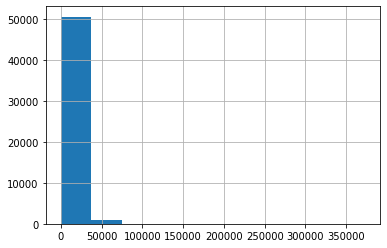

The distribution is skewed to the right
---------------------------------------
Statistics on: mileage_per_year
count     51524.000000
mean      14510.977369
std        8640.370871
min           0.000000
25%        9800.000000
50%       13309.605556
75%       17733.700000
max      373200.000000
Name: mileage_per_year, dtype: float64
---------------------------------------
min border: 2310.8333333333335
max border: 43307.0
---------------------------------------
The outliers are considered to be values below 2310.8333333333335 and above 43307.0
We have 2058 values that we can consider outliers


In [174]:
distribution_percentile_without_mil_nan('mileage_per_year')

And we can't use our full data for further analysis, because we have NaN values in columns, that we compare.
So I make data withou NaN in important columns ( [age_when_posted] and [odometer] )

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~When you fill in the missing values, this won't be a problem.~~
</div>

<div class="alert alert-block alert-info"> <b>But we still have missing values in [odometer] and [mileage_per_year]. So we still need data without NaN.</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~Next time I hope to find in your project an odometer column without gaps~~
    
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
    
Fixed
    
</div>

In [175]:
#df_without_nan = df_without_odo_nan[df_without_odo_nan['age_when_posted'].notna()]
#display(df_without_nan)
#df_without_nan.info()

In [176]:
# Store data without outliers in a separate DataFrame
#filter_outliers = (df_without_nan['price']>np.percentile(df_without_nan['price'], 3))&(df_without_nan['price']<np.percentile(df_without_nan['price'], 99))&(df_without_nan['age_when_posted']<np.percentile(df_without_nan['age_when_posted'], 99))&(df_without_nan['odometer']<np.percentile(df_without_nan['odometer'], 99))
#df_without_outliers = df_without_nan[filter_outliers]
#display(df_without_outliers.info())
#df_without_outliers.describe(include='all')

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Great way to filter out outliers 
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please include  mileage_per_year instead odometer~~
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Done
    
</div>

In [177]:
df_without_nan = df_without_mil_nan[df_without_mil_nan['age_when_posted'].notna()]
display(df_without_nan)
df_without_nan.info()

,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,2,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,1,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,17,11402.941176
4,14900,2017,chrysler 200,excellent,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,4,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,0,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,3,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,2,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51524 non-null  int64         
 1   model_year        51524 non-null  int64         
 2   model             51524 non-null  object        
 3   condition         51524 non-null  object        
 4   condition_id      51524 non-null  int64         
 5   cylinders         51524 non-null  int64         
 6   fuel              51524 non-null  object        
 7   odometer          51524 non-null  float64       
 8   transmission      51524 non-null  object        
 9   type              51524 non-null  object        
 10  paint_color       51524 non-null  object        
 11  is_4wd            51524 non-null  float64       
 12  date_posted       51524 non-null  datetime64[ns]
 13  days_listed       51524 non-null  int64         
 14  weekday_posted    5152

In [178]:
# Store data without outliers in a separate DataFrame
filter_outliers = (df_without_nan['price']>np.percentile(df_without_nan['price'], 3))&(df_without_nan['price']<np.percentile(df_without_nan['price'], 99))&(df_without_nan['age_when_posted']<np.percentile(df_without_nan['age_when_posted'], 99))&(df_without_nan['mileage_per_year']<np.percentile(df_without_nan['mileage_per_year'], 99))
df_without_outliers = df_without_nan[filter_outliers]
display(df_without_outliers.info())
df_without_outliers.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48444 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             48444 non-null  int64         
 1   model_year        48444 non-null  int64         
 2   model             48444 non-null  object        
 3   condition         48444 non-null  object        
 4   condition_id      48444 non-null  int64         
 5   cylinders         48444 non-null  int64         
 6   fuel              48444 non-null  object        
 7   odometer          48444 non-null  float64       
 8   transmission      48444 non-null  object        
 9   type              48444 non-null  object        
 10  paint_color       48444 non-null  object        
 11  is_4wd            48444 non-null  float64       
 12  date_posted       48444 non-null  datetime64[ns]
 13  days_listed       48444 non-null  int64         
 14  weekday_posted    4844

None

,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
count,48444.000000,48444.000000,48444,48444,48444.000000,48444.000000,48444,48444.000000,48444,48444,48444,48444.000000,48444,48444.000000,48444.000000,48444.000000,48444.000000,48444.000000,48444.000000
unique,NaN,NaN,100,6,NaN,NaN,5,NaN,3,13,13,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford f-150,excellent,NaN,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2633,23064,NaN,NaN,44563,NaN,44442,11755,9364,NaN,177,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,12004.986293,2009.933759,NaN,NaN,2.634052,6.079618,NaN,116739.832477,NaN,NaN,NaN,0.491599,NaN,39.569936,3.001817,6.611882,2018.309368,9.375609,14200.556513
std,8538.921859,5.123249,NaN,NaN,0.699076,1.633427,NaN,59606.983942,NaN,NaN,NaN,0.499935,NaN,28.240495,1.994811,3.475710,0.462238,5.134569,6782.180308
min,1005.000000,1992.000000,NaN,NaN,0.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5495.000000,2007.000000,NaN,NaN,2.000000,4.000000,NaN,76956.000000,NaN,NaN,NaN,0.000000,NaN,19.000000,1.000000,3.000000,2018.000000,5.000000,9930.000000


## Study core parameters without outliers

<AxesSubplot:xlabel='price', ylabel='Count'>

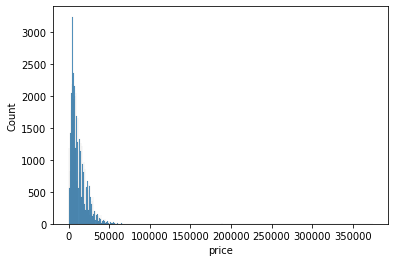

In [179]:
sns.histplot(data=df, x='price')

<AxesSubplot:xlabel='price', ylabel='Count'>

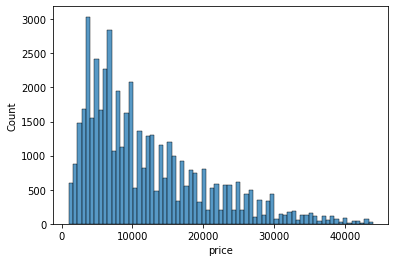

In [180]:
sns.histplot(data=df_without_outliers, x='price')

The distribution is still skewed to the right, but now we can see more details.

<AxesSubplot:xlabel='age_when_posted', ylabel='Count'>

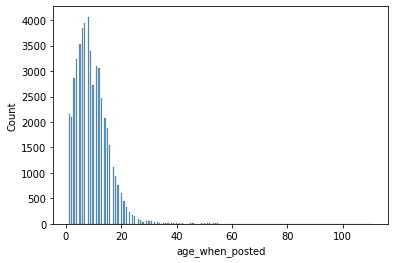

In [181]:
sns.histplot(data=df, x='age_when_posted')

<AxesSubplot:xlabel='age_when_posted', ylabel='Count'>

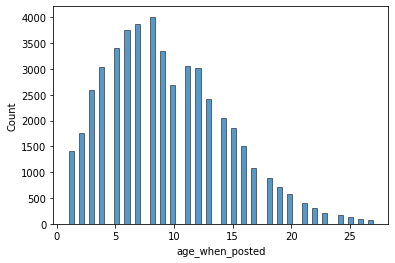

In [182]:
sns.histplot(data=df_without_outliers, x='age_when_posted')

The distribution is still skewed to the right, but now we can see more details too.

<AxesSubplot:xlabel='mileage_per_year', ylabel='Count'>

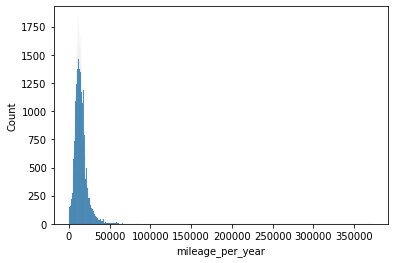

In [183]:
sns.histplot(data=df, x='mileage_per_year')

<AxesSubplot:xlabel='mileage_per_year', ylabel='Count'>

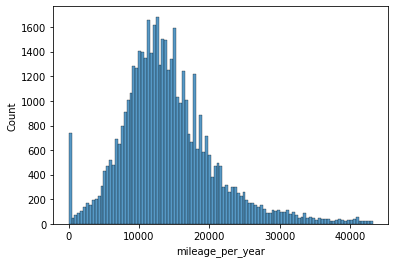

In [184]:
sns.histplot(data=df_without_outliers, x='mileage_per_year')

Here we see almost normal distribution, with peak on 0 (new cars).

And on all 3 histograms we see now, that outliers not very influence on data.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Super Please change the odometer histogram everywhere to the mileage_per_year histogram
    
</div>

<div class="alert alert-block alert-info"> <b>Done</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Done))
    
</div>

<div class="alert alert-block alert-info"> <b>Done?</b> <a class="tocSkip"></a> 
</div>

## Ads lifetime

<AxesSubplot:>

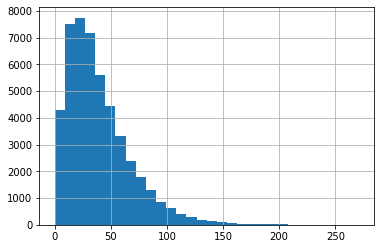

In [185]:
df_without_outliers['days_listed'].hist(bins=30)

In [186]:
df_without_outliers['days_listed'].describe()

count    48444.000000
mean        39.569936
std         28.240495
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Typical lifetime of an ad is 33 days, or near 1 month.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Right
    
</div>

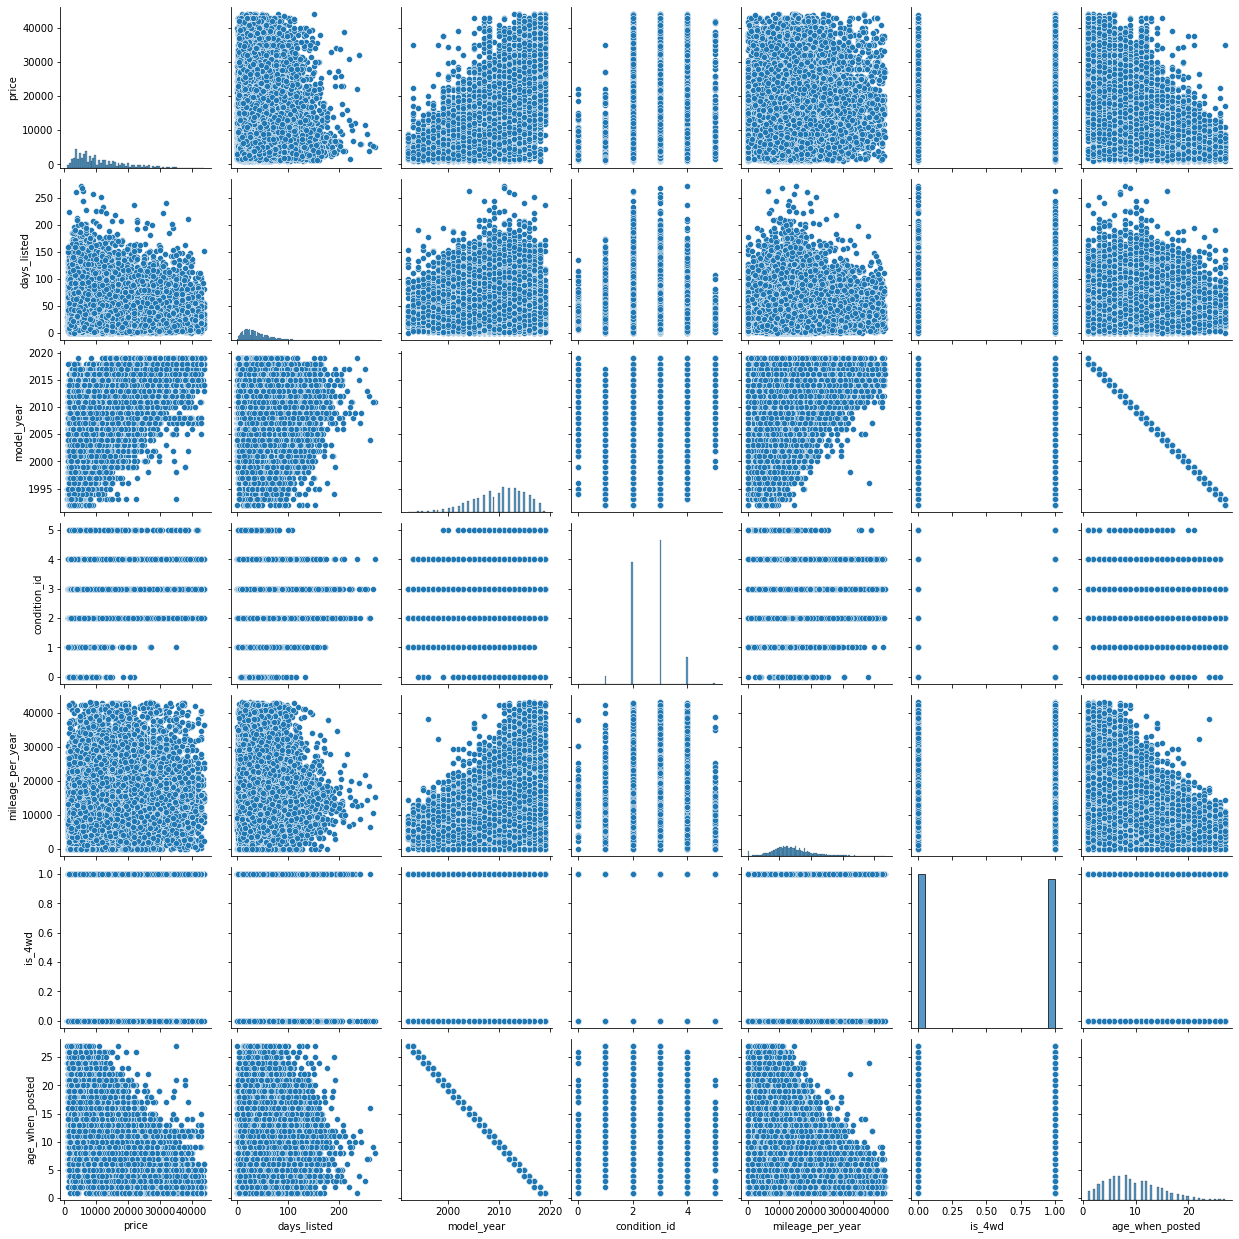

In [187]:
sns.pairplot(df_without_outliers[['price', 'days_listed', 'model_year', 'condition_id', 'mileage_per_year', 'is_4wd', 'age_when_posted']])

I don't see a strong relationship between [days_listed] and some other column.
Maybe in very long days listed we can see some trends: more price - less days listed (because trend down), younger - more days listed (because trend up with model year and trend down with age when posted), less days listed new cars and comdition salvage (kind of normal destr with condition_id)

## Average price per each type of vehicle

In [188]:
type_df = df_without_outliers.pivot_table(index='type', values='price', aggfunc=('mean', 'count', 'median')).sort_values(by='count', ascending=False).reset_index()
type_df

,type,count,mean,median
0,SUV,11755.0,11186.763590,8995.0
1,sedan,11541.0,7178.385495,6000.0
2,truck,11504.0,16287.409423,14995.0
3,pickup,6656.0,15730.917668,14200.0
4,coupe,2001.0,14382.676162,13995.0
5,wagon,1496.0,9172.437834,7950.0
6,mini-van,1123.0,8090.790739,6500.0
7,hatchback,981.0,7021.856269,5999.0
8,van,583.0,10814.406518,7995.0
9,convertible,356.0,13120.418539,12862.5


<AxesSubplot:xlabel='count', ylabel='type'>

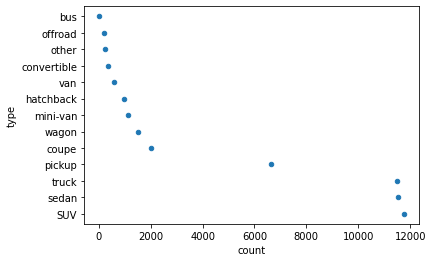

In [189]:
type_df.plot(x='count', y='type', kind='scatter')

Two types with the greatest number of ads - SUV ans sedan, but truck is near too.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Exactly
    
</div>

## Price factors

In [190]:
df_suv = df_without_outliers[df_without_outliers['type']=='SUV']
display(df_suv)
print('--------------------------------------')
df_sedan = df_without_outliers[df_without_outliers['type']=='sedan']
display(df_sedan)
print('--------------------------------------')
df_truck = df_without_outliers[df_without_outliers['type']=='truck']
display(df_truck)

,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
0,9400,2011,bmw x5,good,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,8,18125.000000
7,15990,2013,honda pilot,excellent,3,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0,1,2019,7,15639.000000
8,11500,2012,kia sorento,excellent,3,4,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,0,7,2018,7,14882.000000
9,9200,2008,honda pilot,excellent,3,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,4,2,2019,12,12265.916667
14,12990,2009,gmc yukon,excellent,3,8,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24,3,1,2019,11,12025.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,good,2,6,gas,144500.0,automatic,SUV,unknown,1.0,2019-03-05,1,1,3,2019,8,18062.500000
51496,4999,2002,toyota 4runner,excellent,3,6,gas,177901.0,automatic,SUV,unknown,1.0,2018-05-26,59,5,5,2018,17,10464.764706
51500,6995,2012,buick enclave,excellent,3,6,gas,157000.0,automatic,SUV,white,1.0,2018-08-04,17,5,8,2018,7,22428.571429
51502,7995,2011,chevrolet equinox,like new,4,4,gas,111088.0,automatic,SUV,unknown,0.0,2019-04-01,175,0,4,2019,9,12343.111111


--------------------------------------


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
2,5500,2013,hyundai sonata,like new,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,7,15714.285714
4,14900,2017,chrysler 200,excellent,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,3,26967.666667
5,14990,2014,chrysler 300,excellent,3,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,5,11590.800000
6,12990,2015,toyota camry,excellent,3,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,12,2018,4,19803.000000
11,8990,2012,honda accord,excellent,3,4,gas,111142.0,automatic,sedan,grey,0.0,2019-03-28,29,3,3,2019,8,13892.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,4,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,salvage,0,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,excellent,3,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,good,2,4,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,6,23262.166667


--------------------------------------


,price,model_year,model,condition,condition_id,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age_when_posted,mileage_per_year
22,7500,2004,chevrolet silverado,like new,4,8,gas,180000.0,automatic,truck,red,1.0,2019-01-05,64,5,1,2019,16,11250.000000
39,8000,2009,ford f-150,good,2,8,gas,234000.0,automatic,truck,black,1.0,2019-03-31,1,6,3,2019,11,21272.727273
50,6200,2006,ford f-150,excellent,3,6,gas,69698.0,automatic,truck,custom,0.0,2018-05-03,50,3,5,2018,13,5361.384615
53,10400,2012,chevrolet colorado,excellent,3,5,gas,111871.0,automatic,truck,red,1.0,2019-01-30,27,2,1,2019,8,13983.875000
60,13000,2005,ram 1500,good,2,8,gas,146000.0,automatic,truck,grey,1.0,2019-03-14,26,3,3,2019,15,9733.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51487,1495,2011,ford f-150,fair,1,6,gas,15804.0,manual,truck,white,1.0,2018-09-18,56,1,9,2018,8,1975.500000
51488,21900,2013,chevrolet silverado 3500hd,excellent,3,8,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37,3,12,2018,6,33833.333333
51497,2995,2001,ford f150,good,2,8,gas,206257.0,automatic,truck,red,0.0,2018-12-02,12,6,12,2018,18,11458.722222
51498,15900,2011,gmc sierra 1500,excellent,3,8,gas,119339.0,automatic,truck,unknown,1.0,2019-01-25,69,4,1,2019,9,13259.888889


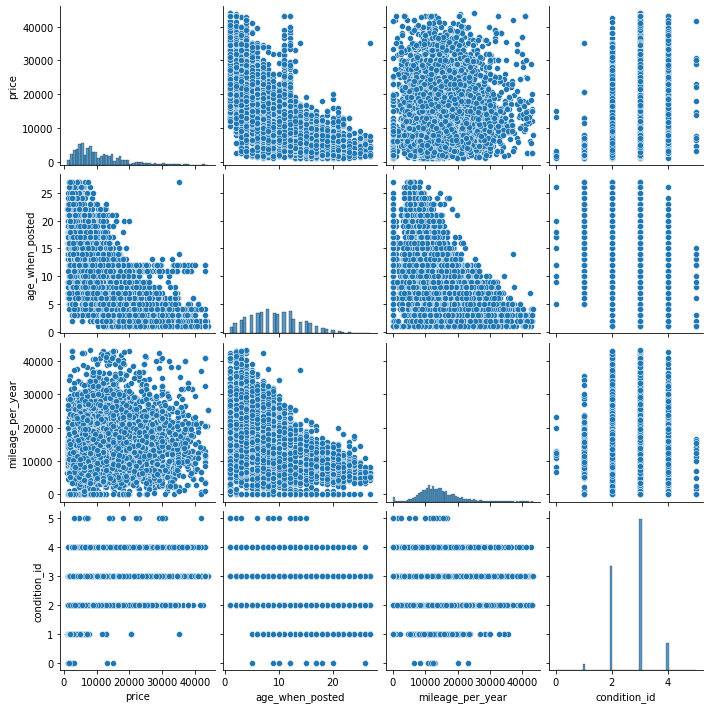

In [191]:
sns.pairplot(df_suv[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']])

In [192]:
df_suv[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']].corr()

,price,age_when_posted,mileage_per_year,condition_id
price,1.000000,-0.644450,0.202391,0.299373
age_when_posted,-0.644450,1.000000,-0.517755,-0.304708
mileage_per_year,0.202391,-0.517755,1.000000,0.006914
condition_id,0.299373,-0.304708,0.006914,1.000000


The biggest influence on the price is the age of the car ([age_when_posted] has -0.51 corr, that means more age - less price). mileage_per_year also has big impact in price (corr -0.51). 

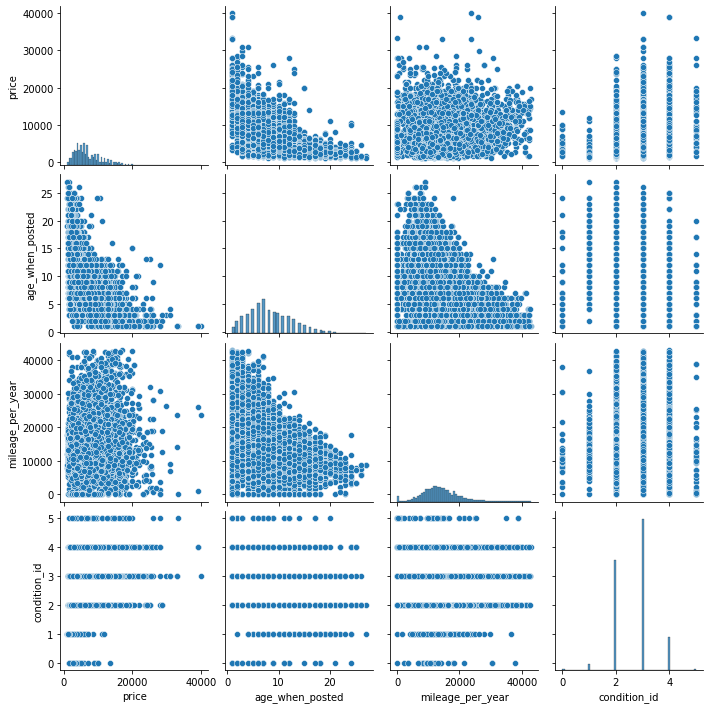

In [193]:
sns.pairplot(df_sedan[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']])

In [194]:
df_sedan[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']].corr()

,price,age_when_posted,mileage_per_year,condition_id
price,1.000000,-0.678580,0.146851,0.317014
age_when_posted,-0.678580,1.000000,-0.456106,-0.269542
mileage_per_year,0.146851,-0.456106,1.000000,-0.019670
condition_id,0.317014,-0.269542,-0.019670,1.000000


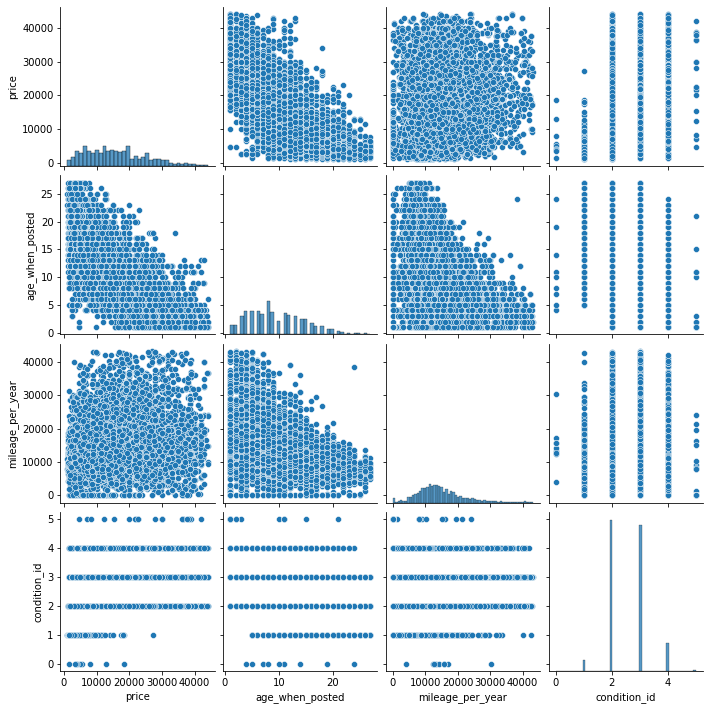

In [195]:
sns.pairplot(df_truck[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']])

In [196]:
df_truck[['price', 'age_when_posted', 'mileage_per_year', 'condition_id']].corr()

,price,age_when_posted,mileage_per_year,condition_id
price,1.000000,-0.707889,0.218694,0.360446
age_when_posted,-0.707889,1.000000,-0.495300,-0.316710
mileage_per_year,0.218694,-0.495300,1.000000,0.011889
condition_id,0.360446,-0.316710,0.011889,1.000000


Sedans and trucks have the same corr's.

In [197]:
print(df_suv['transmission'].value_counts())
print('-------------')
print(df_sedan['transmission'].value_counts())
print('-------------')
print(df_truck['transmission'].value_counts())
print('-------------')
print('-------------')
print(df_suv['paint_color'].value_counts())
print('-------------')
print(df_sedan['paint_color'].value_counts())
print('-------------')
print(df_truck['paint_color'].value_counts())
print('-------------')

automatic    11188
manual         474
other           93
Name: transmission, dtype: int64
-------------
automatic    10909
manual         558
other           74
Name: transmission, dtype: int64
-------------
automatic    11014
manual         413
other           77
Name: transmission, dtype: int64
-------------
-------------
unknown    2116
black      2075
white      1866
silver     1496
grey       1131
blue        981
red         865
green       418
brown       361
custom      280
orange       81
yellow       47
purple       38
Name: paint_color, dtype: int64
-------------
unknown    2059
silver     1964
black      1691
grey       1578
white      1419
blue       1173
red         891
custom      261
brown       253
green       198
purple       24
yellow       21
orange        9
Name: paint_color, dtype: int64
-------------
white      3439
unknown    2003
black      1434
red        1009
silver      959
grey        908
blue        838
custom      291
green       261
brown       234
yellow

We see that there are parameters in color with the number of values less than 50. Need to prepare data for further analysis

In [198]:
df_suv = df_suv[(df_suv['paint_color'] != 'yellow')&(df_suv['paint_color'] != 'purple')]
print(df_suv['paint_color'].value_counts())

unknown    2116
black      2075
white      1866
silver     1496
grey       1131
blue        981
red         865
green       418
brown       361
custom      280
orange       81
Name: paint_color, dtype: int64


In [199]:
df_sedan = df_sedan[(df_sedan['paint_color'] != 'yellow')&(df_sedan['paint_color'] != 'purple')&(df_sedan['paint_color'] != 'orange')]
print(df_sedan['paint_color'].value_counts())

unknown    2059
silver     1964
black      1691
grey       1578
white      1419
blue       1173
red         891
custom      261
brown       253
green       198
Name: paint_color, dtype: int64


In [200]:
df_truck = df_truck[(df_truck['paint_color'] != 'purple')&(df_truck['paint_color'] != 'orange')]
print(df_truck['paint_color'].value_counts())

white      3439
unknown    2003
black      1434
red        1009
silver      959
grey        908
blue        838
custom      291
green       261
brown       234
yellow       66
Name: paint_color, dtype: int64


We prepared categorical data for analysis.

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,11112.0,11148.865371,7847.760675,1095.0,5450.0,8975.0,14990.0,43900.0
manual,465.0,11734.819355,6786.445360,1195.0,6400.0,10950.0,16500.0,36000.0
other,93.0,12502.817204,5879.431973,2000.0,7995.0,12900.0,16950.0,28999.0


<AxesSubplot:xlabel='transmission', ylabel='price'>

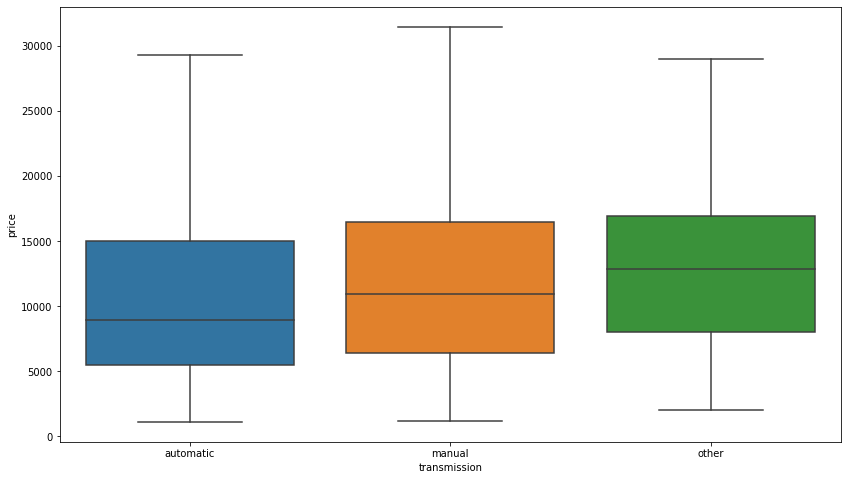

In [201]:
display(df_suv.groupby(['transmission'])['price'].describe())
plt.figure(figsize=(14,8))
sns.boxplot(x="transmission", y="price", data=df_suv, showfliers = False)

In SUV we see that price increase from automatic to manual and other. But it's not very strong correlation and we see thet almost in all of transmissions median is in the middle of body of boxplot, so we near the normal distribution (skewed in the right, of course)

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10859.0,7250.233171,4131.115102,1005.0,4170.0,6300.0,9495.0,40000.0
manual,557.0,5686.960503,3733.715718,1050.0,3000.0,4695.0,6995.0,25000.0
other,71.0,7835.084507,3812.641266,1988.0,5499.5,5999.0,10599.5,20700.0


<AxesSubplot:xlabel='transmission', ylabel='price'>

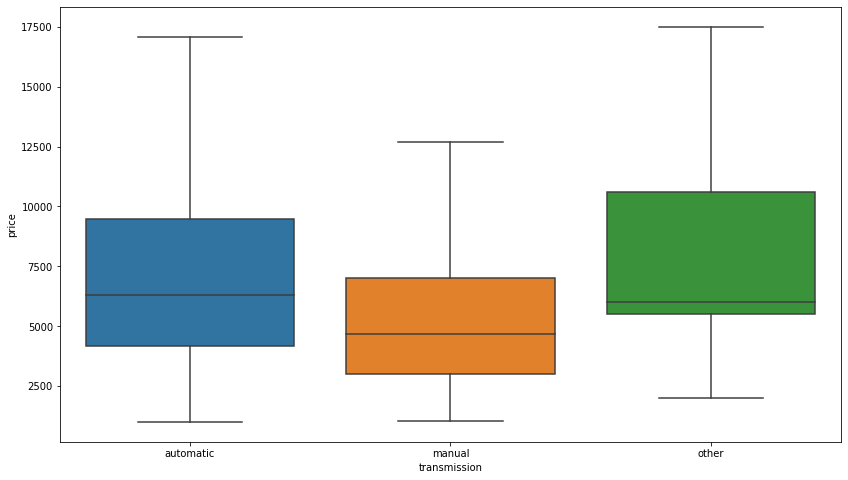

In [202]:
display(df_sedan.groupby(['transmission'])['price'].describe())
plt.figure(figsize=(14,8))
sns.boxplot(x="transmission", y="price", data=df_sedan, showfliers = False)

In Sedan group we see, that manual transmission has less price.

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,10954.0,16543.752054,9231.294073,1100.0,8995.0,15495.0,22899.0,43990.0
manual,411.0,10303.262774,7653.753144,1200.0,4500.0,8000.0,14638.5,42000.0
other,77.0,16505.155844,8276.302572,2788.0,9995.0,13995.0,23995.0,34995.0


<AxesSubplot:xlabel='transmission', ylabel='price'>

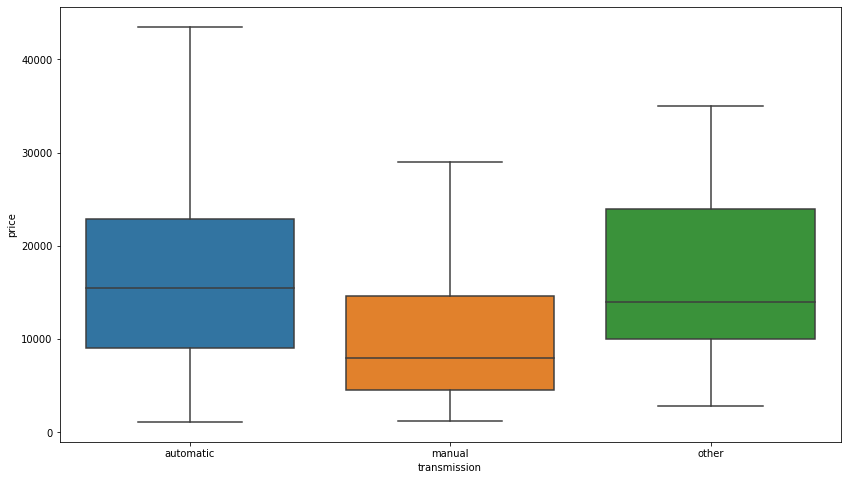

In [203]:
display(df_truck.groupby(['transmission'])['price'].describe())
plt.figure(figsize=(14,8))
sns.boxplot(x="transmission", y="price", data=df_truck, showfliers = False)

In truck group we also see, that manual transmission has less price.

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
orange,81.0,16315.172840,7900.245898,2599.0,11900.00,16900.0,18555.00,42995.0
black,2075.0,13261.521446,8718.876605,1100.0,6470.00,11900.0,16999.50,43900.0
white,1866.0,12211.420150,8352.295020,1100.0,5995.00,9990.0,16498.75,43675.0
unknown,2116.0,11369.166352,7981.462064,1150.0,5500.00,8995.0,14995.00,42995.0
grey,1131.0,11076.486295,7769.119367,1250.0,5372.50,8900.0,14837.50,39500.0
custom,280.0,10198.753571,6597.346329,1100.0,5771.25,8794.0,12990.25,41490.0
silver,1496.0,10266.578877,6634.667363,1150.0,5279.25,8495.0,13990.00,40995.0
red,865.0,10081.563006,7126.763351,1100.0,4699.00,7988.0,13990.00,40264.0
brown,361.0,8772.545706,6116.347828,1350.0,4000.00,7300.0,11995.00,38989.0


<AxesSubplot:xlabel='paint_color', ylabel='price'>

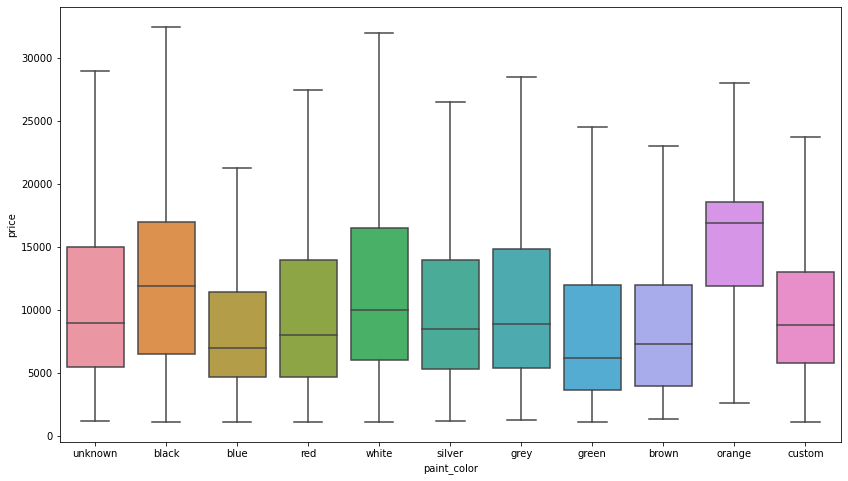

In [204]:
display(df_suv.groupby(['paint_color'])['price'].describe().sort_values(by='50%',ascending=False))
plt.figure(figsize=(14,8))
sns.boxplot(x="paint_color", y="price", data=df_suv, showfliers = False)

In SUV we have 2 favourites - black and orange. And nobody loves green and blue.

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
black,1691.0,7725.746895,4290.332243,1050.0,4498.5,6995.0,9997.0,40000.0
white,1419.0,7710.086681,4311.951178,1200.0,4670.0,6900.0,9995.0,31000.0
grey,1578.0,7187.854246,3860.508788,1100.0,4495.0,6457.5,8999.0,29777.0
unknown,2059.0,7231.142788,4159.231715,1005.0,4000.0,6295.0,9495.0,38997.0
red,891.0,7285.710438,4157.576516,1100.0,4250.0,6000.0,9499.5,25390.0
custom,261.0,7184.478927,4477.288609,1500.0,3995.0,5995.0,8999.0,33390.0
silver,1964.0,6977.780041,4010.521348,1200.0,3995.0,5995.0,8995.0,28000.0
blue,1173.0,6684.166240,3998.460732,1150.0,3995.0,5800.0,8500.0,25947.0
brown,253.0,5290.197628,3254.170023,1200.0,2995.0,4498.0,6950.0,22199.0


<AxesSubplot:xlabel='paint_color', ylabel='price'>

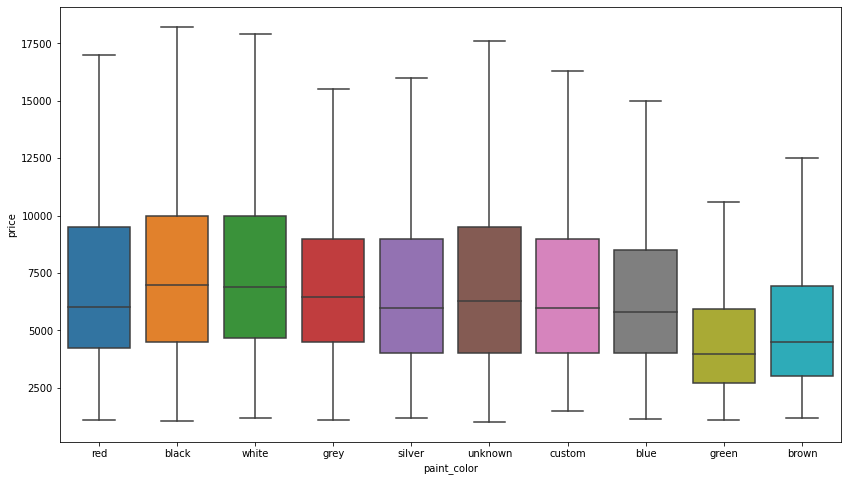

In [205]:
display(df_sedan.groupby(['paint_color'])['price'].describe().sort_values(by='50%',ascending=False))
plt.figure(figsize=(14,8))
sns.boxplot(x="paint_color", y="price", data=df_sedan, showfliers = False)

In sedan category price almost not depends from color, just green and brown have a lower median.

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
black,1434.0,18447.467225,9875.658765,1200.0,9999.0,17995.0,25900.0,43990.0
yellow,66.0,15851.803030,6158.007138,1900.0,13747.5,17490.0,17490.0,34999.0
unknown,2003.0,16648.116825,9281.512301,1200.0,8995.0,15900.0,22990.0,43990.0
white,3439.0,16495.876999,9069.478898,1100.0,9642.5,15300.0,21900.0,43990.0
grey,908.0,17188.887665,9479.473763,1250.0,9800.0,14995.0,23500.0,43990.0
silver,959.0,15963.695516,8861.460603,1500.0,8988.0,14500.0,21724.5,43900.0
custom,291.0,15045.931271,8063.201260,1500.0,8422.5,14000.0,19990.0,41999.0
blue,838.0,15302.332936,8476.371357,1100.0,8988.0,13999.0,20998.5,41500.0
red,1009.0,14451.304262,9222.569340,1200.0,6900.0,12990.0,20500.0,42500.0


<AxesSubplot:xlabel='paint_color', ylabel='price'>

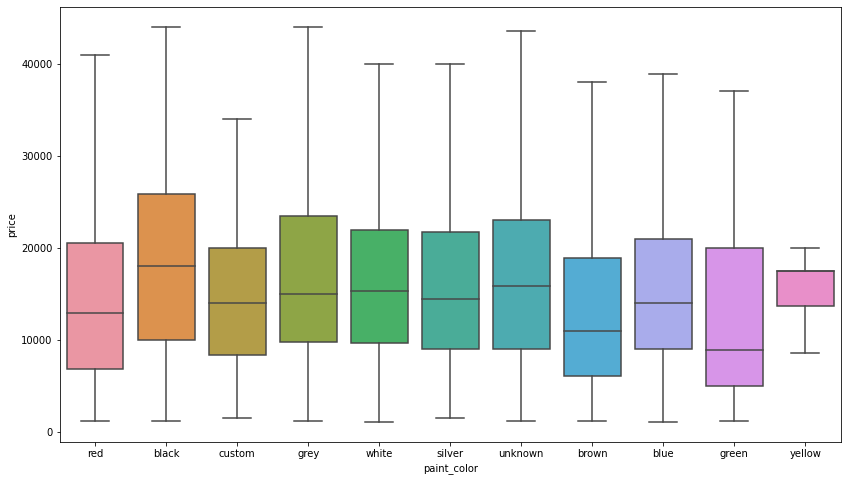

In [206]:
display(df_truck.groupby(['paint_color'])['price'].describe().sort_values(by='50%',ascending=False))
plt.figure(figsize=(14,8))
sns.boxplot(x="paint_color", y="price", data=df_truck, showfliers = False)

In truck we have red, brown and again green in outsiders.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Perfect study of price factors
    
</div>

## General conclusion

In start we had not ideal data, so we needed to prepare it for analysis. I was forced to delete about 20% of the data because of missing values. We can't fill they in because these were missing values of specific individual data, such we couldn't restore. Then I removed the outliers because they were affecting the data. And then i tried to figure out what affects to price  with help of scatterplots, histograms and boxplots.
Unfortunately I haven't got any amazing finds. Nevertheless we see on charts that younger vehicles with less odometer value have bigger price. Also, the automatic transmission affects the price increase (but not in SUV category, where people appreciate cars with manual transmittion more).
We can also notice that the color of the vehicle affects the price. In all categories, the colors brown and green have the lowest median price. So if you want buy a car maybe more profitable will be buy a green or brown car and change color after.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Good conclusion but please correct it after fixing the missing values
    
</div>

<div class="alert alert-block alert-info"> <b>I hope you accept the project even though I didn't fill in the missing values in the [odometer] column.
I can do it with a formula like this for example:
    df['odometer'] = df['odometer'].fillna(df.groupby(['model', 'type'])['odometer'].transform('median'))
    but I really don't think it's the best idea, because cars are used very differently and we can't guess the mileage of a car. And to replace it with the average value for the model seems not right to me.</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
I will gladly approve your project when you fill in the gaps in the odometer
    
     df['odometer'] = df['odometer'].fillna(df.groupby(['model_year', 'condition'])['odometer'].transform('median')) 
    
</div>

<div class="alert alert-block alert-info"> <b>Done!!</b> <a class="tocSkip"></a> 
</div>